Saving Instagram_data_by_Bhanu.csv to Instagram_data_by_Bhanu.csv
Dataset Shape: (119, 13)

Columns: ['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows', 'Caption', 'Hashtags']

Summary Statistics:
         Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000  

/tmp/ipython-input-2507597981.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Likes', y='Caption', data=top_likes, palette='coolwarm')
/tmp/ipython-input-2507597981.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


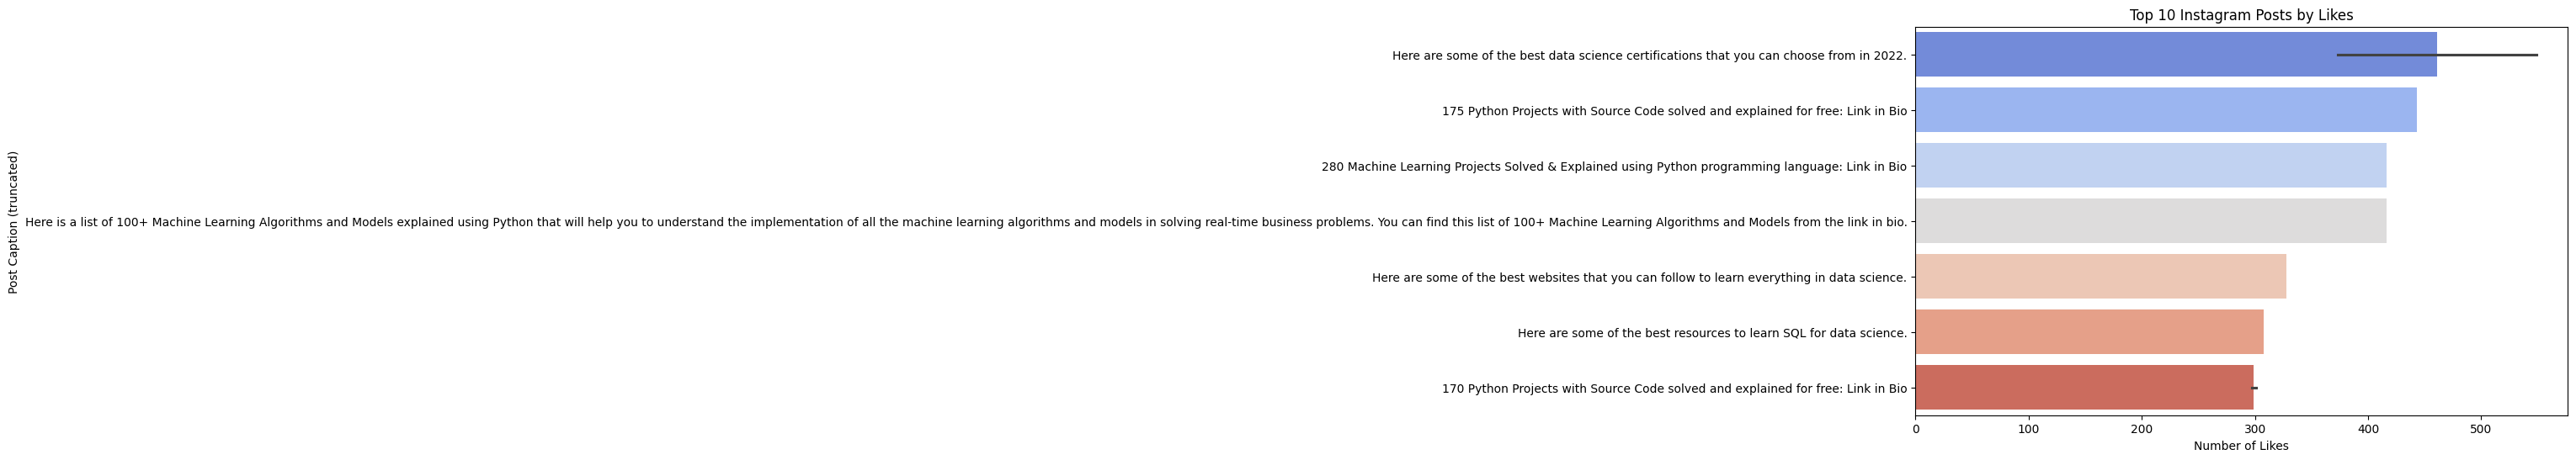

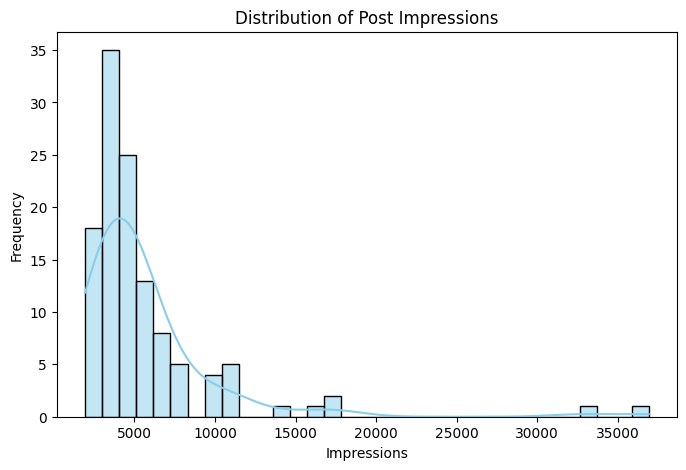

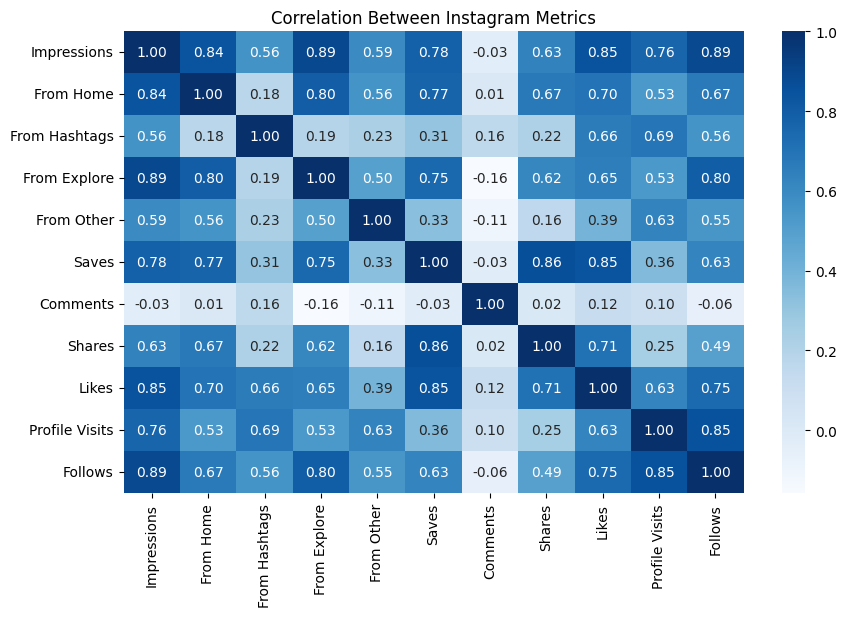

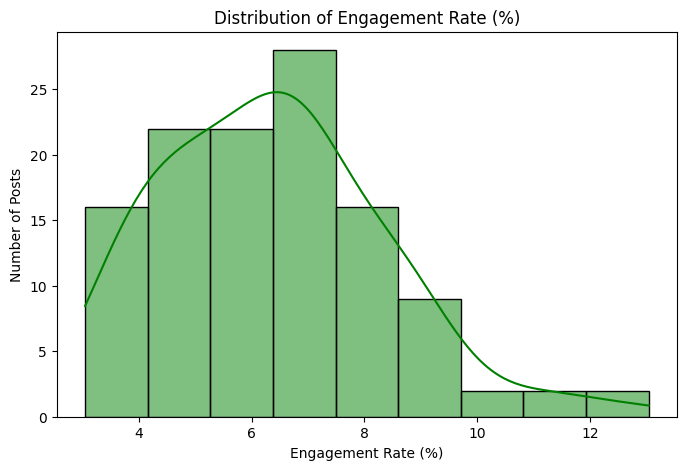

/tmp/ipython-input-2507597981.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_engagement.values, y=hashtag_engagement.index, palette='mako')


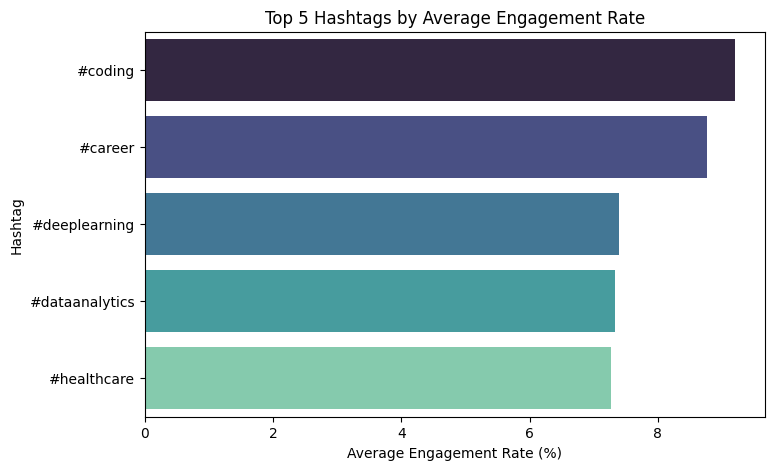

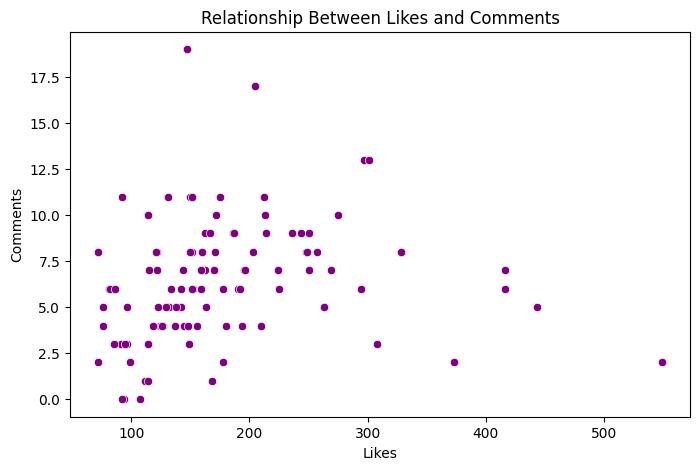


✅ Dashboard Visualizations Generated Successfully!


In [1]:
from google.colab import files
uploaded = files.upload()
# Instagram Analytics Dashboard using Python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Instagram_data_by_Bhanu.csv", encoding='ISO-8859-1')

# ---- Basic Overview ----
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSummary Statistics:\n", df.describe())

# ---- 1️⃣ Top Posts by Likes ----
top_likes = df.nlargest(10, 'Likes')
plt.figure(figsize=(10,6))
sns.barplot(x='Likes', y='Caption', data=top_likes, palette='coolwarm')
plt.title("Top 10 Instagram Posts by Likes")
plt.xlabel("Number of Likes")
plt.ylabel("Post Caption (truncated)")
plt.tight_layout()
plt.show()

# ---- 2️⃣ Distribution of Impressions ----
plt.figure(figsize=(8,5))
sns.histplot(df['Impressions'], kde=True, color='skyblue')
plt.title("Distribution of Post Impressions")
plt.xlabel("Impressions")
plt.ylabel("Frequency")
plt.show()

# ---- 3️⃣ Correlation Heatmap ----
numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Between Instagram Metrics")
plt.show()

# ---- 4️⃣ Engagement Rate Calculation ----
df['Engagement_Rate'] = ((df['Likes'] + df['Comments'] + df['Saves'] + df['Shares']) / df['Impressions']) * 100

plt.figure(figsize=(8,5))
sns.histplot(df['Engagement_Rate'], kde=True, color='green')
plt.title("Distribution of Engagement Rate (%)")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Number of Posts")
plt.show()

# ---- 5️⃣ Top 5 Hashtags by Average Engagement ----
df['Primary_Hashtag'] = df['Hashtags'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
hashtag_engagement = df.groupby('Primary_Hashtag')['Engagement_Rate'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=hashtag_engagement.values, y=hashtag_engagement.index, palette='mako')
plt.title("Top 5 Hashtags by Average Engagement Rate")
plt.xlabel("Average Engagement Rate (%)")
plt.ylabel("Hashtag")
plt.show()

# ---- 6️⃣ Relationship: Likes vs Comments ----
plt.figure(figsize=(8,5))
sns.scatterplot(x='Likes', y='Comments', data=df, color='purple')
plt.title("Relationship Between Likes and Comments")
plt.xlabel("Likes")
plt.ylabel("Comments")
plt.show()

print("\n✅ Dashboard Visualizations Generated Successfully!")